In [108]:
import cv2
import matplotlib.pyplot as plt

In [109]:
video=cv2.VideoCapture("race_car.mp4")
ok,frame=video.read()

In [110]:
if not video.isOpened:
    print("Can't Read The File")
elif ok==False:
    print("Can't Read The File")
else:
    height=int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
    width=int(video.get(cv2.CAP_PROP_FRAME_WIDTH))

In [111]:
def drawRectangel(frame,bbox):
    p1=(int(bbox[0]),int(bbox[1]))
    p2=(int(bbox[0]+bbox[2]),int(bbox[1]+bbox[2]))
    cv2.rectangle(frame,p1,p2,(155,0,0),4,1)
    
def displayAnnotation(frame,bbox):
    framecopy=frame.copy()
    drawRectangel(framecopy,bbox)
    plt.imshow(framecopy)
    plt.axis("off")

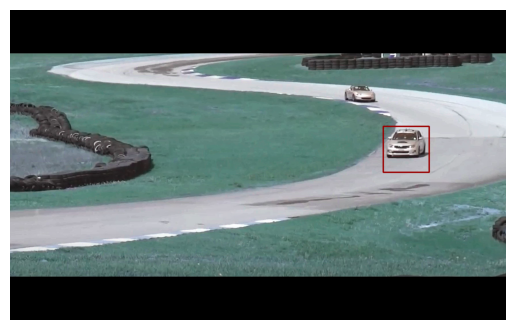

In [112]:
bbox=[1300,405,160,120]
displayAnnotation(frame,bbox)

In [113]:
tracker_types=["Boosting","MIL","KCF","CSRT","TLD","Medianflow","GOTURN","MOOSE"]
tracker_type=tracker_types[0]
if tracker_type=='Boosting':
    tracker=cv2.legacy.TrackerBoosting.create()
elif tracker_type=='MIL':
    tracker=cv2.TrackerMIL_create()
elif tracker_type=='KCF':
    tracker=cv2.TrackerKCF_create()
elif tracker_type=='CSRT':
    tracker=cv2.TrackerCSRT.create()
elif tracker_type=='TLD':
    tracker=cv2.legacy.TrackerTLD.create()
elif tracker_type=='Medianflow':
    tracker=cv2.legacy.TrackerMedianFlow.create()
elif tracker_type=='GOTURN':
    tracker=cv2.TrackerGOTURN.create()
else:
    tracker=cv2.legacy.TrackerMOOSE.create()

In [114]:
ok=tracker.init(frame,bbox)

In [115]:
video_output_file_name = "race_car_PC-" + tracker_type + ".mp4"
video_out = cv2.VideoWriter(filename=video_output_file_name, fourcc=cv2.VideoWriter_fourcc(*"XVID"), fps=10, frameSize=(width,height))

In [116]:
while True:
    ok, frame = video.read()

    if not ok:
        break

    # Start timer
    timer = cv2.getTickCount()

    # Update tracker
    ok, bbox = tracker.update(frame)

    # Calculate Frames per second (FPS)
    fps = cv2.getTickFrequency() / (cv2.getTickCount() - timer)

    # Draw bounding box
    if ok:
        drawRectangel(frame, bbox)
    else:
        break;
        
    # Write frame to video
    video_out.write(frame)

video.release()
video_out.release()